# BCM Rule

## Two neurons projecting to one

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [58]:
STEPS_DIM = 0.001
THETA_START = 0.07
ETA = float('1e-4')
TOT_TIME = 10
TAU = 0.02
Y0 = 10

STEPS_N = round(TOT_TIME/STEPS_DIM)

time_vect = np.linspace(0,TOT_TIME, STEPS_N)

theta = np.zeros((1,STEPS_N))
theta[0,0] = THETA_START

w = ([1,0.5]*np.ones((STEPS_N,2))).T
rand_seq = np.random.randint(0,2,STEPS_N)
x = np.array([rand_seq, 1-rand_seq])*20
y = np.zeros((1,STEPS_N))

for i in range(1,STEPS_N):
    y[0,i] = w[:,i-1].dot(x[:,i-1])
    w[:,i] = w[:,i-1] + (ETA*x[:,i-1]*y[0,i]*(y[0,i] - theta[0,i-1]))*STEPS_DIM
    theta[0,i] = theta[0,i-1] + (STEPS_DIM/TAU) * (-theta[0,i-1] + (y[0,i]**2)/Y0)
    
    w[w < 0] = 0
    
    



Plot the values of y and the weights

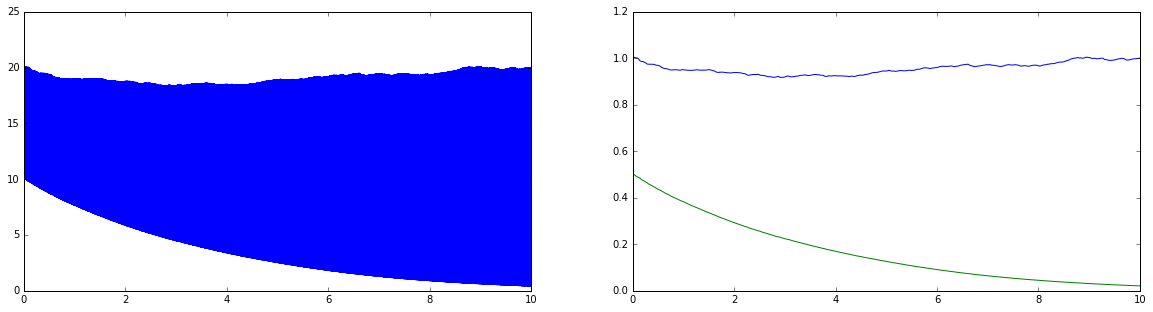

In [59]:
f, ax = plt.subplots(1,2, figsize = (20,5))
ax[0].plot(time_vect, y[0,:])
#plt.ylim(0, 0.001)
#plt.xlim(9.8, 10)

ax[1].plot(time_vect, w[0,:])
ax[1].plot(time_vect, w[1,:])
#plt.ylim(-50, 10)
#plt.xlim(0, 100)
plt.show()


## Multiple neurons

In [131]:
def simple_network():
    STEPS_DIM = 0.001
    TOT_TIME = 10
    
    THETA_START = 0.07
    ETA = float('1e-3')
    TAU = 0.05
    Y0 = 10
    
    X_NUM = 2
    Y_NUM = 3

    STEPS_N = round(TOT_TIME/STEPS_DIM)

    time_vect = np.linspace(0,TOT_TIME, STEPS_N)

    theta = np.zeros((Y_NUM,STEPS_N))
    theta[:,0] = THETA_START

    w = np.random.random([Y_NUM, X_NUM, STEPS_N])
    
    rand_seq = np.random.randint(0,2,STEPS_N)
    x = np.array([rand_seq, 1-rand_seq])*20
    y = np.zeros((Y_NUM,STEPS_N))
    
    X_NUM = 2
    Y_NUM = 3
    w = np.random.random([X_NUM, Y_NUM, STEPS_N])
    rand_seq = np.random.randint(0,2,STEPS_N)
    x = np.array([rand_seq, 1-rand_seq])*20
    y = np.zeros((Y_NUM,STEPS_N))
    theta = np.zeros((Y_NUM,STEPS_N))

    for i in range(1,STEPS_N):
        y[:,i] = w[:,:,i-1].dot(x[:,i-1])
        w[:,:,i] = w[:,:,i-1] + x[:,i-1, None] * (y[:,i, None]*(y[:,i, None] - theta[:,i-1, None])).T
        #w[:,:,i] = w[:,:,i-1] + ETA*STEPS_DIM*(
        #    x[:,i-1, None] * (y[:,i, None]*(y[:,i, None] - theta[:,i-1, None])).T)
        
        theta[:,i] = theta[:,i-1] + (STEPS_DIM/TAU) * (-theta[:,i-1] + (y[:,i]**2)/Y0)

        w[w < 0] = 0
    
    return y, w
    

In [132]:
y, w = simple_network()

ValueError: shapes (2,3) and (2,) not aligned: 3 (dim 1) != 2 (dim 0)

In [127]:
X_NUM = 2
Y_NUM = 3
w = np.random.random([X_NUM, Y_NUM, STEPS_N])
rand_seq = np.random.randint(0,2,STEPS_N)
x = np.array([rand_seq, 1-rand_seq])*20
y = np.zeros((Y_NUM,STEPS_N))
theta = np.zeros((Y_NUM,STEPS_N))

In [128]:
w[:,:,i] = w[:,:,i-1] + x[:,i-1, None] * (y[:,i, None]*(y[:,i, None] - theta[:,i-1, None])).T

In [120]:
w[:,:,i]

array([[ 0.91896377,  0.06174454,  0.18789442],
       [ 0.74392978,  0.63716398,  0.36300814]])

In [109]:
x[:,i-1, None].shape

(2, 1)